In [1]:
!pip install openpyxl

### 부동산 가격 분석 프로젝트

In [2]:
# 데이터 출처: 한국주택공사,공공데이터 포털
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl

In [3]:
# 파일 불러오기
FILE1='../Pandas/data/금리.xls'
FILE2='../Pandas/data/가계대출.xlsx'
FILE3='../Pandas/data/주택담보대출.xlsx'
FILE4='../Pandas/data/아파트_매매수급동향.csv'
FILE5='../Pandas/data/통합 가계 대출.xlsx'
FILE6='../Pandas/data/통합 주택 담보대출.xlsx'
FILE7='../Pandas/data/분기별 기준금리.xlsx'

In [4]:
# 기준 금리 현황
rate=pd.read_excel(FILE1)
rate.info()
print(rate.head())
print(rate.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      332 non-null    int64  
 1   기준금리    284 non-null    float64
 2   국고채     332 non-null    float64
 3   회사채     332 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 10.5 KB
       시점  기준금리    국고채    회사채
0  199505   NaN  14.81  14.90
1  199506   NaN  14.58  14.67
2  199507   NaN  14.09  14.17
3  199508   NaN  13.13  13.22
4  199509   NaN  12.82  12.91
         시점  기준금리    국고채    회사채
327  202208  2.50  3.247  4.227
328  202209  2.50  3.903  4.900
329  202210  3.00  4.235  5.436
330  202211  3.25  3.895  5.487
331  202212  3.25  3.630  5.302


In [5]:
# 금리 추세 분기별 정리(2017~2022)
# '국고책','회사채' 열 삭제
rateQuar=rate.iloc[269:329]
rateQuar.drop(labels=['국고채','회사채'],axis=1,inplace=True)
rateQuar

C:\Users\hyunk\AppData\Local\Temp\ipykernel_4796\1694481474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rateQuar.drop(labels=['국고채','회사채'],axis=1,inplace=True)


,시점,기준금리
269,201710,1.25
270,201711,1.50
271,201712,1.50
272,201801,1.50
273,201802,1.50
274,201803,1.50
275,201804,1.50
276,201805,1.50
277,201806,1.50
278,201807,1.50


In [6]:
# rateQuar의 행 인덱스를 '시점'으로 변경
rateQuar.set_index('시점', inplace=True)

In [7]:
# 분기별로 3달씩 더하기
# 3행씩 같은 수가 들어가 있는 것을 확인
for i in range(0,20):
    rateQuar.iloc[i:i+3] = round(rateQuar.iloc[i:i+3].mean(),2)
    rateQuar.drop([rateQuar.index[i+1],rateQuar.index[i+2]],inplace=True)


C:\Users\hyunk\AppData\Local\Temp\ipykernel_4796\3841908277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rateQuar.iloc[i:i+3] = round(rateQuar.iloc[i:i+3].mean(),2)
C:\Users\hyunk\AppData\Local\Temp\ipykernel_4796\3841908277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rateQuar.drop([rateQuar.index[i+1],rateQuar.index[i+2]],inplace=True)
C:\Users\hyunk\AppData\Local\Temp\ipykernel_4796\3841908277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [8]:
# 행인덱스 정리
rateQuar.index=['17.4','18.1','18.2','18.3','18.4','19.1','19.2','19.3','19.4','20.1','20.2','20.3','20.4','21.1','21.2','21.3','21.4','22.1','22.2','22.3']
rateQuar.index.name = '시점'
rateQuar

,기준금리
시점,
17.4,1.42
18.1,1.50
18.2,1.50
18.3,1.50
18.4,1.67
19.1,1.75
19.2,1.75
19.3,1.50
19.4,1.25


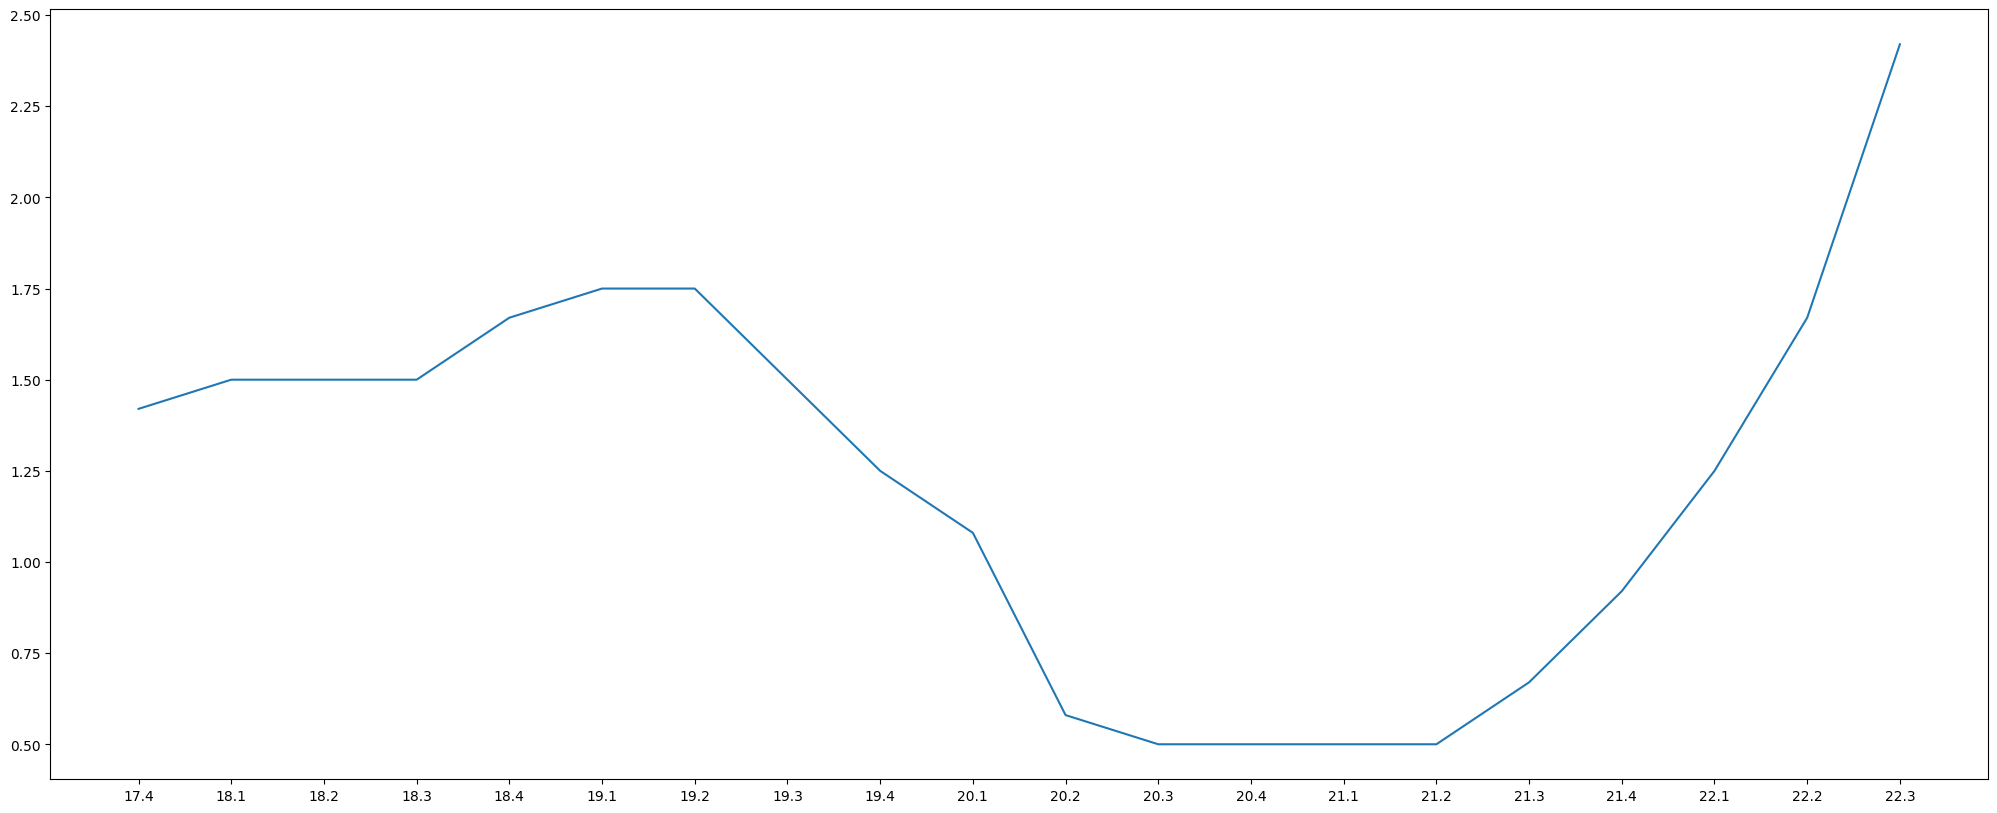

In [9]:
x_1 = rateQuar.index
plt.figure(figsize=(25,10))
plt.plot(x_1,rateQuar['기준금리'])
plt.show()

In [10]:
# 가계 대출
loan=pd.read_excel(FILE2)
loan.info()
print(loan.head())
print(loan.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시점       179 non-null    int64  
 1   서울특별시    179 non-null    float64
 2   부산광역시    179 non-null    float64
 3   대구광역시    179 non-null    float64
 4   인천광역시    179 non-null    float64
 5   광주광역시    179 non-null    float64
 6   대전광역시    179 non-null    float64
 7   울산광역시    179 non-null    float64
 8   경기도      179 non-null    float64
 9   강원도      179 non-null    float64
 10  충청북도     179 non-null    float64
 11  충청남도     179 non-null    float64
 12  전라북도     179 non-null    float64
 13  전라남도     179 non-null    float64
 14  경상북도     179 non-null    float64
 15  경상남도     179 non-null    float64
 16  제주특별자치도  179 non-null    float64
 17  세종특별자치시  122 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 25.3 KB
       시점     서울특별시    부산광역시    대구광역시    인천광역시    광주광역시    대전광역시   울산광역시  \
0  2007

In [11]:
# 결측치 확인 
loan.isnull().sum()

시점          0
서울특별시       0
부산광역시       0
대구광역시       0
인천광역시       0
광주광역시       0
대전광역시       0
울산광역시       0
경기도         0
강원도         0
충청북도        0
충청남도        0
전라북도        0
전라남도        0
경상북도        0
경상남도        0
제주특별자치도     0
세종특별자치시    57
dtype: int64

In [12]:
# 가계 대출 금액 분기별 정리(2017~2022)
loanQuar=loan.iloc[118:178]
# loanQuar의 행 인덱스를 '시점'으로 변경
loanQuar.set_index('시점', inplace=True)
loanQuar


,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,세종특별자치시
시점,,,,,,,,,,,,,,,,,
201710,278568.7,58977.0,39972.5,53213.7,22053.2,24315.9,21546.1,234047.7,18186.7,20936.6,32010.8,23355.1,21117.2,37560.4,56051.9,13479.8,6868.0
201711,281452.2,59452.5,40243.4,53430.0,22294.7,24440.8,21604.1,235720.2,18486.7,21095.2,32142.2,23664.7,21327.2,37871.0,56305.1,13673.9,6872.0
201712,282438.7,59751.4,40263.5,53621.1,22426.1,24472.1,21663.2,236950.8,18715.9,21293.0,32286.8,23809.0,21543.1,38089.7,56504.5,13883.9,6856.8
201801,283669.8,59989.4,40438.4,53641.0,22596.4,24598.2,21558.9,237552.4,18825.2,21402.0,32250.9,23921.0,21551.6,38165.9,56517.9,13993.4,6877.8
201802,284094.8,60264.0,40417.4,53778.0,22567.4,24511.3,21535.6,238653.8,18872.3,21473.4,32192.1,24092.8,21575.5,37970.2,56582.1,14065.0,6942.5
201803,285382.6,60473.6,40409.3,54001.1,22646.9,24479.8,21500.4,240314.5,18922.1,21535.7,32230.1,24029.6,21655.7,37943.3,56737.8,14193.1,7020.9
201804,287303.5,60526.2,40414.1,54101.4,22793.8,24506.4,21555.3,241848.0,19154.8,21744.2,32422.9,24238.1,21788.9,38106.1,56955.2,14311.9,7150.5
201805,288940.0,60935.2,40426.3,54286.7,22976.5,24582.4,21599.3,243011.9,19385.1,21928.7,32551.4,24300.3,21828.4,38198.5,57178.6,14434.4,7262.7
201806,289868.6,61499.0,40616.7,54358.9,23010.5,24705.9,21677.1,244622.9,19503.3,22025.0,32753.3,24401.0,22010.0,38362.3,57534.1,14602.1,7342.3


In [13]:
# 분기별로 3달씩 더하기
for i in range(0,20):
    loanQuar.iloc[i:i+3] = round(loanQuar.iloc[i:i+3].sum())
    loanQuar.drop([loanQuar.index[i+1],loanQuar.index[i+2]],inplace=True)
loanQuar

C:\Users\hyunk\AppData\Local\Temp\ipykernel_4796\2935803936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loanQuar.iloc[i:i+3] = round(loanQuar.iloc[i:i+3].sum())
C:\Users\hyunk\AppData\Local\Temp\ipykernel_4796\2935803936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loanQuar.drop([loanQuar.index[i+1],loanQuar.index[i+2]],inplace=True)
C:\Users\hyunk\AppData\Local\Temp\ipykernel_4796\2935803936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,세종특별자치시
시점,,,,,,,,,,,,,,,,,
201710,842460.0,178181.0,120479.0,160265.0,66774.0,73229.0,64813.0,706719.0,55389.0,63325.0,96440.0,70829.0,63988.0,113521.0,168862.0,41038.0,20597.0
201801,853147.0,180727.0,121265.0,161420.0,67811.0,73589.0,64595.0,716521.0,56620.0,64411.0,96673.0,72043.0,64783.0,114079.0,169838.0,42252.0,20841.0
201804,866112.0,182960.0,121457.0,162747.0,68781.0,73795.0,64832.0,729483.0,58043.0,65698.0,97728.0,72939.0,65627.0,114667.0,171668.0,43348.0,21756.0
201807,879671.0,186408.0,122327.0,163631.0,69896.0,74896.0,65021.0,741758.0,59318.0,66388.0,98831.0,73606.0,66500.0,115573.0,173906.0,44708.0,22241.0
201810,900843.0,190835.0,124289.0,165310.0,71898.0,75898.0,65184.0,756331.0,60928.0,68051.0,99574.0,75031.0,67962.0,116951.0,175569.0,46327.0,22302.0
201901,907661.0,193006.0,125073.0,167090.0,73308.0,76018.0,64050.0,764873.0,61480.0,67915.0,98836.0,75277.0,67915.0,116605.0,175409.0,46796.0,22381.0
201904,920640.0,193624.0,125675.0,169544.0,74337.0,76303.0,63992.0,775825.0,62210.0,67908.0,98788.0,75787.0,68784.0,116739.0,175156.0,47204.0,22512.0
201907,940606.0,194606.0,127399.0,172749.0,75410.0,77398.0,65079.0,787649.0,63230.0,69005.0,100419.0,76936.0,70267.0,117326.0,175184.0,47966.0,23215.0
201910,963226.0,197511.0,129765.0,175487.0,77424.0,79163.0,64903.0,801718.0,64057.0,69509.0,100856.0,78141.0,71358.0,117768.0,175426.0,48839.0,23692.0


In [14]:
# 전체 대출 합계
Alloan1=loanQuar.sum(axis=1)   
Alloan1

시점
201710    2906909.0
201801    2940615.0
201804    2981641.0
201807    3024679.0
201810    3083283.0
201901    3103693.0
201904    3135028.0
201907    3184444.0
201910    3238843.0
202001    3264467.0
202004    3311694.0
202007    3382328.0
202010    3489431.0
202101    3569783.0
202104    3648824.0
202107    3721089.0
202110    3776968.0
202201    3772873.0
202204    3764532.0
202207    3758421.0
dtype: float64

In [15]:
# 대출 수도권: '인천광역시','경기도','서울'열만 추출
Alloan2=loanQuar[['인천광역시','경기도','서울특별시']]
Alloan2

,인천광역시,경기도,서울특별시
시점,,,
201710,160265.0,706719.0,842460.0
201801,161420.0,716521.0,853147.0
201804,162747.0,729483.0,866112.0
201807,163631.0,741758.0,879671.0
201810,165310.0,756331.0,900843.0
201901,167090.0,764873.0,907661.0
201904,169544.0,775825.0,920640.0
201907,172749.0,787649.0,940606.0
201910,175487.0,801718.0,963226.0


In [16]:
#인천광역시+경기도+서울 = 수도권 합
Alloan2=Alloan2.sum(axis=1)   #axis=1 행
Alloan2

시점
201710    1709444.0
201801    1731088.0
201804    1758342.0
201807    1785060.0
201810    1822484.0
201901    1839624.0
201904    1866009.0
201907    1901004.0
201910    1940431.0
202001    1964747.0
202004    2004139.0
202007    2056448.0
202010    2126646.0
202101    2179575.0
202104    2235647.0
202107    2287389.0
202110    2326915.0
202201    2328073.0
202204    2328680.0
202207    2328763.0
dtype: float64

In [17]:
#지방 열만 추출
Alloan3=loanQuar[['부산광역시','대구광역시','광주광역시','대전광역시','울산광역시','세종특별자치시','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도']]
Alloan3

,부산광역시,대구광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
시점,,,,,,,,,,,,,,
201710,178181.0,120479.0,66774.0,73229.0,64813.0,20597.0,55389.0,63325.0,96440.0,70829.0,63988.0,113521.0,168862.0,41038.0
201801,180727.0,121265.0,67811.0,73589.0,64595.0,20841.0,56620.0,64411.0,96673.0,72043.0,64783.0,114079.0,169838.0,42252.0
201804,182960.0,121457.0,68781.0,73795.0,64832.0,21756.0,58043.0,65698.0,97728.0,72939.0,65627.0,114667.0,171668.0,43348.0
201807,186408.0,122327.0,69896.0,74896.0,65021.0,22241.0,59318.0,66388.0,98831.0,73606.0,66500.0,115573.0,173906.0,44708.0
201810,190835.0,124289.0,71898.0,75898.0,65184.0,22302.0,60928.0,68051.0,99574.0,75031.0,67962.0,116951.0,175569.0,46327.0
201901,193006.0,125073.0,73308.0,76018.0,64050.0,22381.0,61480.0,67915.0,98836.0,75277.0,67915.0,116605.0,175409.0,46796.0
201904,193624.0,125675.0,74337.0,76303.0,63992.0,22512.0,62210.0,67908.0,98788.0,75787.0,68784.0,116739.0,175156.0,47204.0
201907,194606.0,127399.0,75410.0,77398.0,65079.0,23215.0,63230.0,69005.0,100419.0,76936.0,70267.0,117326.0,175184.0,47966.0
201910,197511.0,129765.0,77424.0,79163.0,64903.0,23692.0,64057.0,69509.0,100856.0,78141.0,71358.0,117768.0,175426.0,48839.0


In [18]:
#지방 대출 합계
Alloan3=Alloan3.sum(axis=1)   #axis=1 행
Alloan3

시점
201710    1197465.0
201801    1209527.0
201804    1223299.0
201807    1239619.0
201810    1260799.0
201901    1264069.0
201904    1269019.0
201907    1283440.0
201910    1298412.0
202001    1299720.0
202004    1307555.0
202007    1325880.0
202010    1362785.0
202101    1390208.0
202104    1413177.0
202107    1433700.0
202110    1450053.0
202201    1444800.0
202204    1435852.0
202207    1429658.0
dtype: float64

In [19]:
# 전국,수도권,지방 분기별 합계 합치기
loanresult=pd.concat([Alloan1,Alloan2,Alloan3],axis=1)
loanresult=round(loanresult/1000,)
loanresult.columns=['전국','수도권','지방']
loanresult.index=['17.4','18.1','18.2','18.3','18.4','19.1','19.2','19.3','19.4','20.1','20.2','20.3','20.4','21.1','21.2','21.3','21.4','22.1','22.2','22.3']
# loanresult.index.name = '시점'
loanresult

,전국,수도권,지방
17.4,2907.0,1709.0,1197.0
18.1,2941.0,1731.0,1210.0
18.2,2982.0,1758.0,1223.0
18.3,3025.0,1785.0,1240.0
18.4,3083.0,1822.0,1261.0
19.1,3104.0,1840.0,1264.0
19.2,3135.0,1866.0,1269.0
19.3,3184.0,1901.0,1283.0
19.4,3239.0,1940.0,1298.0
20.1,3264.0,1965.0,1300.0


In [20]:
# 주택 담보대출
loan2=pd.read_excel(FILE3)
loan2.info()
print(loan2.head())
print(loan2.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시점       179 non-null    int64  
 1   서울특별시    179 non-null    float64
 2   부산광역시    179 non-null    float64
 3   대구광역시    179 non-null    float64
 4   인천광역시    179 non-null    float64
 5   광주광역시    179 non-null    float64
 6   대전광역시    179 non-null    float64
 7   울산광역시    179 non-null    float64
 8   경기도      179 non-null    float64
 9   강원도      179 non-null    float64
 10  충청북도     179 non-null    float64
 11  충청남도     179 non-null    float64
 12  전라북도     179 non-null    float64
 13  전라남도     179 non-null    float64
 14  경상북도     179 non-null    float64
 15  경상남도     179 non-null    float64
 16  제주특별자치도  179 non-null    float64
 17  세종특별자치시  122 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 25.3 KB
       시점     서울특별시    부산광역시    대구광역시    인천광역시   광주광역시   대전광역시   울산광역시  \
0  200712

In [21]:
# 대출 금액 분기별 정리(2017~2022)
loan2Quar=loan2.iloc[118:178]
# df의 행 인덱스를 '시점'으로 변경
loan2Quar.set_index('시점', inplace=True)
loan2Quar.head(3)
loan2Quar.tail(3)

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,세종특별자치시
시점,,,,,,,,,,,,,,,,,
202207,244961.7,54349.5,34916.2,48372.7,19207.9,17475.9,11875.6,195910.7,10317.6,10241.2,16246.9,12224.2,10917.8,16617.4,30324.1,5480.7,5577.3
202208,245175.6,54464.1,35209.5,48727.6,19172.0,17432.9,11853.4,196212.5,10436.8,10270.0,16483.3,12301.0,10901.6,16690.2,30578.4,5503.5,5553.9
202209,245385.2,54486.6,35458.2,49108.9,19166.3,17484.5,11812.9,196845.1,10484.2,10283.2,16520.1,12329.1,10936.0,16761.5,30748.4,5587.1,5566.9


In [22]:
# 분기별로 3달씩 더하기
for i in range(0,20):
    loan2Quar.iloc[i:i+3] = round(loan2Quar.iloc[i:i+3].sum(),)
    loan2Quar.drop([loan2Quar.index[i+1],loan2Quar.index[i+2]],inplace=True)
loan2Quar

C:\Users\hyunk\AppData\Local\Temp\ipykernel_4796\2454054083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2Quar.iloc[i:i+3] = round(loan2Quar.iloc[i:i+3].sum(),)
C:\Users\hyunk\AppData\Local\Temp\ipykernel_4796\2454054083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2Quar.drop([loan2Quar.index[i+1],loan2Quar.index[i+2]],inplace=True)
C:\Users\hyunk\AppData\Local\Temp\ipykernel_4796\2454054083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,세종특별자치시
시점,,,,,,,,,,,,,,,,,
201710,528770.0,123074.0,78139.0,112034.0,41521.0,43759.0,35343.0,452200.0,21930.0,28370.0,42862.0,32579.0,23910.0,49746.0,85241.0,13802.0,13828.0
201801,532055.0,124559.0,79222.0,112826.0,42312.0,43888.0,35052.0,458055.0,22544.0,28756.0,42614.0,32939.0,24176.0,49461.0,85333.0,14102.0,13869.0
201804,535801.0,125842.0,79528.0,113254.0,42753.0,43586.0,34814.0,465483.0,23163.0,29046.0,42596.0,33038.0,24108.0,49176.0,86006.0,14282.0,14571.0
201807,540510.0,128399.0,79792.0,113561.0,43424.0,44068.0,34731.0,473812.0,23829.0,29079.0,42448.0,32968.0,24064.0,49398.0,86809.0,14557.0,14932.0
201810,549191.0,131494.0,80936.0,114887.0,44441.0,44230.0,34578.0,482857.0,24501.0,29735.0,42401.0,33327.0,24518.0,49239.0,86740.0,14764.0,14835.0
201901,552049.0,132607.0,81817.0,117035.0,45212.0,44527.0,34556.0,490118.0,25185.0,29718.0,42293.0,33259.0,24864.0,49216.0,87319.0,14928.0,14928.0
201904,558903.0,133152.0,82499.0,119222.0,45824.0,44574.0,34404.0,497932.0,25552.0,29249.0,41911.0,32836.0,25731.0,48903.0,86894.0,14933.0,14974.0
201907,567696.0,134991.0,84201.0,122227.0,46924.0,45071.0,34262.0,507971.0,25856.0,29604.0,42500.0,33097.0,26233.0,48692.0,85907.0,15097.0,15443.0
201910,579760.0,137269.0,85151.0,124409.0,48076.0,46198.0,33980.0,517566.0,26325.0,29917.0,42462.0,33588.0,26701.0,48607.0,85443.0,15321.0,15726.0


In [23]:
# 전체 대출 합계
houseloan1=loan2Quar.sum(axis=1)   
houseloan1

시점
201710    1727108.0
201801    1741763.0
201804    1757047.0
201807    1776381.0
201810    1802674.0
201901    1819631.0
201904    1837493.0
201907    1865772.0
201910    1896499.0
202001    1909166.0
202004    1939618.0
202007    1967618.0
202010    2021013.0
202101    2071261.0
202104    2100216.0
202107    2146679.0
202110    2193515.0
202201    2213083.0
202204    2226110.0
202207    2240945.0
dtype: float64

In [24]:
# 대출 수도권: '인천광역시','경기도','서울'열만 추출
houseloan2=loan2Quar[['인천광역시','경기도','서울특별시']]
houseloan2


,인천광역시,경기도,서울특별시
시점,,,
201710,112034.0,452200.0,528770.0
201801,112826.0,458055.0,532055.0
201804,113254.0,465483.0,535801.0
201807,113561.0,473812.0,540510.0
201810,114887.0,482857.0,549191.0
201901,117035.0,490118.0,552049.0
201904,119222.0,497932.0,558903.0
201907,122227.0,507971.0,567696.0
201910,124409.0,517566.0,579760.0


In [25]:
#인천광역시+경기도+서울 = 수도권 합
houseloan2=houseloan2.sum(axis=1)   #axis=1 행
houseloan2

시점
201710    1093004.0
201801    1102936.0
201804    1114538.0
201807    1127883.0
201810    1146935.0
201901    1159202.0
201904    1176057.0
201907    1197894.0
201910    1221735.0
202001    1236914.0
202004    1263669.0
202007    1286906.0
202010    1322740.0
202101    1355883.0
202104    1378881.0
202107    1411354.0
202110    1444040.0
202201    1455148.0
202204    1463273.0
202207    1470699.0
dtype: float64

In [26]:
#지방 열만 추출
houseloan3=loan2Quar[['부산광역시','대구광역시','광주광역시','대전광역시','울산광역시','세종특별자치시','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주특별자치도']]
houseloan3


,부산광역시,대구광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
시점,,,,,,,,,,,,,,
201710,123074.0,78139.0,41521.0,43759.0,35343.0,13828.0,21930.0,28370.0,42862.0,32579.0,23910.0,49746.0,85241.0,13802.0
201801,124559.0,79222.0,42312.0,43888.0,35052.0,13869.0,22544.0,28756.0,42614.0,32939.0,24176.0,49461.0,85333.0,14102.0
201804,125842.0,79528.0,42753.0,43586.0,34814.0,14571.0,23163.0,29046.0,42596.0,33038.0,24108.0,49176.0,86006.0,14282.0
201807,128399.0,79792.0,43424.0,44068.0,34731.0,14932.0,23829.0,29079.0,42448.0,32968.0,24064.0,49398.0,86809.0,14557.0
201810,131494.0,80936.0,44441.0,44230.0,34578.0,14835.0,24501.0,29735.0,42401.0,33327.0,24518.0,49239.0,86740.0,14764.0
201901,132607.0,81817.0,45212.0,44527.0,34556.0,14928.0,25185.0,29718.0,42293.0,33259.0,24864.0,49216.0,87319.0,14928.0
201904,133152.0,82499.0,45824.0,44574.0,34404.0,14974.0,25552.0,29249.0,41911.0,32836.0,25731.0,48903.0,86894.0,14933.0
201907,134991.0,84201.0,46924.0,45071.0,34262.0,15443.0,25856.0,29604.0,42500.0,33097.0,26233.0,48692.0,85907.0,15097.0
201910,137269.0,85151.0,48076.0,46198.0,33980.0,15726.0,26325.0,29917.0,42462.0,33588.0,26701.0,48607.0,85443.0,15321.0


In [27]:
#지방 대출 합계
houseloan3=houseloan3.sum(axis=1)   #axis=1 행
houseloan3


시점
201710    634104.0
201801    638827.0
201804    642509.0
201807    648498.0
201810    655739.0
201901    660429.0
201904    661436.0
201907    667878.0
201910    674764.0
202001    672252.0
202004    675949.0
202007    680712.0
202010    698273.0
202101    715378.0
202104    721335.0
202107    735325.0
202110    749475.0
202201    757935.0
202204    762837.0
202207    770246.0
dtype: float64

In [28]:
# 전국,수도권,지방 분기별 합계 합치기
houseresult=pd.concat([houseloan1,houseloan2,houseloan3],axis=1)
houseresult=round(houseresult/1000,)
houseresult.columns=['전국','수도권','지방']
houseresult.index=['17.4','18.1','18.2','18.3','18.4','19.1','19.2','19.3','19.4','20.1','20.2','20.3','20.4','21.1','21.2','21.3','21.4','22.1','22.2','22.3']
houseresult.index.name = '시점'
houseresult

,전국,수도권,지방
시점,,,
17.4,1727.0,1093.0,634.0
18.1,1742.0,1103.0,639.0
18.2,1757.0,1115.0,643.0
18.3,1776.0,1128.0,648.0
18.4,1803.0,1147.0,656.0
19.1,1820.0,1159.0,660.0
19.2,1837.0,1176.0,661.0
19.3,1866.0,1198.0,668.0
19.4,1896.0,1222.0,675.0


In [29]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

font_location = r'C:\Windows\Fonts\malgun.ttf'  # 백슬래시 앞에 'r'을 추가하여 이스케이프 문자를 무시합니다.
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

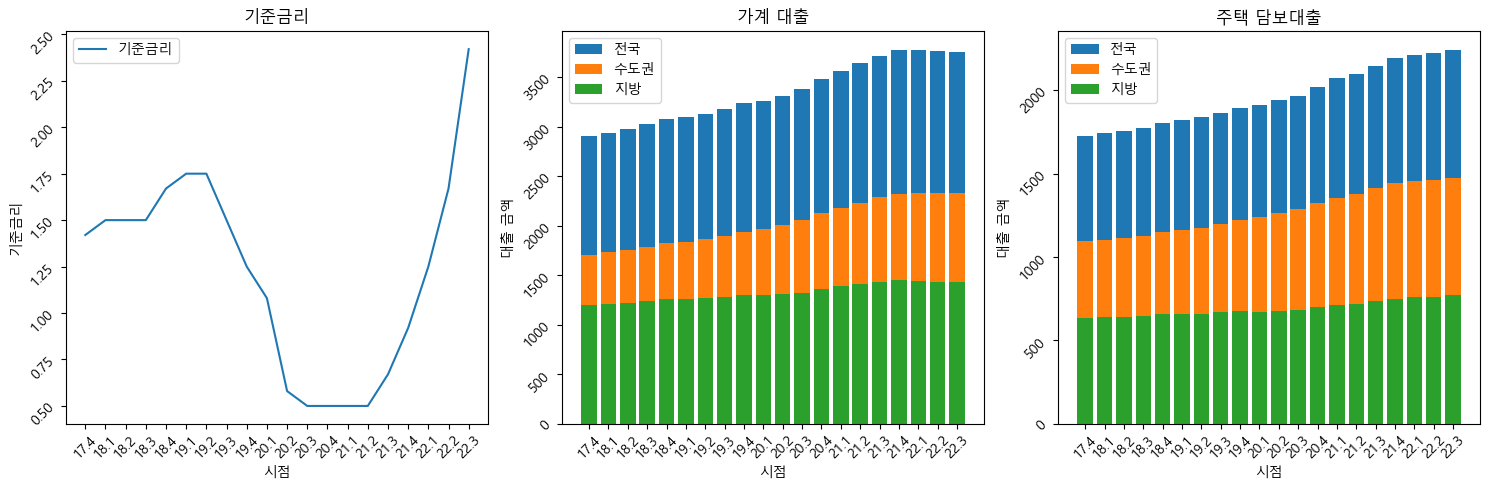

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# 금리 변동 그래프
x_1 = rateQuar.index
axes[0].plot(x_1, rateQuar['기준금리'], label='기준금리')
axes[0].set_xlabel('시점') 
axes[0].set_ylabel('기준금리') 
axes[0].set_title('기준금리')
axes[0].tick_params(rotation=45)
axes[0].legend()

# 가계 대출 그래프
x_2 = loanresult.index
axes[1].bar(x_2, loanresult['전국'], label='전국')
axes[1].bar(x_2, loanresult['수도권'], label='수도권')
axes[1].bar(x_2, loanresult['지방'], label='지방')
axes[1].set_xlabel('시점') 
axes[1].set_ylabel('대출 금액') 
axes[1].set_title('가계 대출')
axes[1].tick_params(rotation=45)
axes[1].legend()

# 주택 담보대출 그래프
x_3 = houseresult.index
axes[2].bar(x_3, houseresult['전국'], label='전국')
axes[2].bar(x_3, houseresult['수도권'], label='수도권')
axes[2].bar(x_3, houseresult['지방'], label='지방')
axes[2].set_xlabel('시점') # xlabel 추가
axes[2].set_ylabel('대출 금액') # ylabel 추가
axes[2].set_title('주택 담보대출')
axes[2].tick_params(rotation=45)
axes[2].legend()

plt.tight_layout()  # 그래프 간격 조정
plt.show()


In [31]:
# 가계 대출-주택 담보 대출
Result=loanresult-houseresult
Result

,전국,수도권,지방
17.4,1180.0,616.0,563.0
18.1,1199.0,628.0,571.0
18.2,1225.0,643.0,580.0
18.3,1249.0,657.0,592.0
18.4,1280.0,675.0,605.0
19.1,1284.0,681.0,604.0
19.2,1298.0,690.0,608.0
19.3,1318.0,703.0,615.0
19.4,1343.0,718.0,623.0
20.1,1355.0,728.0,628.0


In [32]:
# 열 인덱스 변경
loanresult.columns=['가계대출_전국','가계대출_수도권','가계대출_지방']
loanresult

,가계대출_전국,가계대출_수도권,가계대출_지방
17.4,2907.0,1709.0,1197.0
18.1,2941.0,1731.0,1210.0
18.2,2982.0,1758.0,1223.0
18.3,3025.0,1785.0,1240.0
18.4,3083.0,1822.0,1261.0
19.1,3104.0,1840.0,1264.0
19.2,3135.0,1866.0,1269.0
19.3,3184.0,1901.0,1283.0
19.4,3239.0,1940.0,1298.0
20.1,3264.0,1965.0,1300.0


In [33]:
# 열 인덱스 변경
houseresult.columns=['주택담보_전국','주택담보_수도권','주택담보_지방']
houseresult

,주택담보_전국,주택담보_수도권,주택담보_지방
시점,,,
17.4,1727.0,1093.0,634.0
18.1,1742.0,1103.0,639.0
18.2,1757.0,1115.0,643.0
18.3,1776.0,1128.0,648.0
18.4,1803.0,1147.0,656.0
19.1,1820.0,1159.0,660.0
19.2,1837.0,1176.0,661.0
19.3,1866.0,1198.0,668.0
19.4,1896.0,1222.0,675.0


In [34]:
# 아파트_매매수급동향
# 0에 가까울수록 공급>수요, 200에 가까울수록 공급<수요100에 가까우면 수요와 공급 비중이 비슷하다는 것을 뜻함
trade=pd.read_csv(FILE4,encoding='cp949')
trade.info()
print(trade.head())
print(trade.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Columns: 123 entries, 지역 to 2022-08
dtypes: float64(122), object(1)
memory usage: 39.5+ KB
       지역    2012-07    2012-08    2012-09    2012-10    2012-11    2012-12  \
0     전국   80.516399  82.889044  84.054431  84.626657  86.092114  85.789033   
1    수도권   69.543147  71.922589  71.795685  71.430838  73.826142  73.588198   
2    지방권   89.135310  91.502617  93.683030  94.991278  95.726389  95.367372   
3  6대광역시   76.771047  81.468172  84.394251  85.549281  85.497947  86.062628   
4  5대광역시   81.191223  85.642633  89.341693  91.097179  90.721003  91.630094   

     2013-01    2013-02    2013-03  ...     2021-11    2021-12    2022-01  \
0  85.265802  86.486675  88.082612  ...  100.534286  95.721184  93.958571   
1  72.810914  73.540609  75.452237  ...   99.617838  94.074988  91.604478   
2  95.043587  96.650062  97.995019  ...  101.362598  97.209226  96.086271   
3  86.165298  86.370637  87.731006  ...   99.033401  95.

In [35]:
# 전국,수도권,지방 자료 (아파트 매매 수급 동향)
tradeDF=trade.iloc[0:3]
tradeDF.head()
DF=tradeDF[['2021-09','2021-10','2021-11','2021-12','2022-01','2022-02','2022-03','2022-04','2022-05','2022-06','2022-07','2022-08']]
DF.index=['전국','수도권','지역']
DF=round(DF,)
DF
# 전국,수도권,지방 자료 (가계대출)


,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08
전국,123.0,113.0,101.0,96.0,94.0,93.0,94.0,94.0,94.0,93.0,91.0,87.0
수도권,129.0,115.0,100.0,94.0,92.0,90.0,91.0,92.0,92.0,90.0,88.0,84.0
지역,118.0,111.0,101.0,97.0,96.0,95.0,96.0,96.0,96.0,95.0,93.0,91.0


In [36]:
# 금리 추세 분기별 정리(2021-09~2022-08)
rateQuar2=rate.iloc[316:328]
rateQuar2.drop(labels=['국고채','회사채'],axis=1,inplace=True)
# rateQuar의 행 인덱스를 '시점'으로 변경
rateQuar2.set_index('시점', inplace=True)
rateQuar2

C:\Users\hyunk\AppData\Local\Temp\ipykernel_4796\3602587237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rateQuar2.drop(labels=['국고채','회사채'],axis=1,inplace=True)


,기준금리
시점,
202109,0.75
202110,0.75
202111,1.00
202112,1.00
202201,1.25
202202,1.25
202203,1.25
202204,1.50
202205,1.75
